## Merged Unique Song Analysis
This is a continuation of the analysis conducted on Billboard-unique and Spotify-unique songs using the merged datasets across all years (2017, 2020, 2021).

Chris Chien

In [1]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
# Loading in the merged datasets
spotifyonly = pd.read_csv("../data/Clean/spotifyonly_allyears.csv")
billboardonly = pd.read_csv("../data/Clean/billboardonly_allyears.csv")

In [3]:
spotifyonly.head()

,Unnamed: 0,Unnamed: 0.1,rank,name,album,artist,release_date,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,explicit,duration_sec
0,33,33,34,LOVE. FEAT. ZACARI.,DAMN.,Kendrick Lamar,2017-04-14,0.800,0.2640,0.585,0.00000,0.153,-7.343,0.0924,126.058,0.779,True,213.400
1,38,38,39,Portland,More Life,Drake,2017-03-18,0.925,0.0172,0.443,0.00000,0.276,-8.216,0.2640,136.078,0.350,True,236.614
2,42,42,43,BUTTERFLY EFFECT,BUTTERFLY EFFECT,Travis Scott,2017-05-18,0.763,0.0714,0.598,0.00000,0.112,-6.865,0.0539,140.987,0.182,False,190.677
3,55,55,56,X (feat. Future),Savage Mode,21 Savage,2016-07-15,0.835,0.3730,0.413,0.00133,0.101,-9.810,0.3960,149.004,0.111,True,258.880
4,59,59,60,I Fall Apart,Stoney (Deluxe),Post Malone,2016-12-09,0.556,0.0689,0.538,0.00000,0.196,-5.408,0.0382,143.950,0.291,True,223.346


In [4]:
billboardonly.head()

,Unnamed: 0,Unnamed: 0.1,Rank,name,album,artist,release_date,duration_ms,popularity,danceability,...,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,explicit,duration_sec
0,29,29,30,Scars To Your Beautiful,Know-It-All (Deluxe),Alessia Cara,2015-11-13,230226,76,0.573,...,0.739,0.000000,0.1110,-5.740,0.1290,97.085,4,0.451,False,230.226
1,37,37,38,Don't Wanna Know (feat. Kendrick Lamar),Red Pill Blues (Deluxe),Maroon 5,2017-11-03,214265,0,0.776,...,0.620,0.000000,0.0978,-6.198,0.0670,100.025,4,0.427,False,214.265
2,38,38,39,Look What You Made Me Do,Look What You Made Me Do,Taylor Swift,2017-08-24,211859,0,0.767,...,0.671,0.000011,0.1290,-6.416,0.1420,128.072,4,0.474,False,211.859
3,42,42,43,Side To Side,Dangerous Woman,Ariana Grande,2016-05-20,226160,11,0.650,...,0.736,0.000000,0.2350,-5.840,0.2290,159.173,4,0.613,True,226.160
4,43,43,44,Rockabye (feat. Sean Paul & Anne-Marie),Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2016-10-21,251088,78,0.720,...,0.763,0.000000,0.1800,-4.068,0.0523,101.965,4,0.742,False,251.088


To begin with, I recreate the mean Spotify attributes bar graph that was previously generated for individual years' lists:

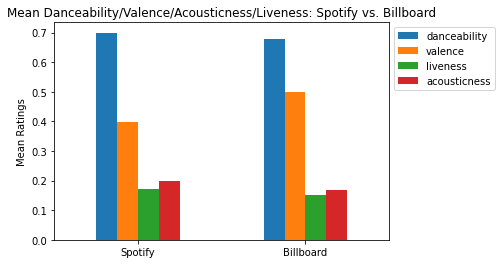

In [5]:
spotify_mean_dance = spotifyonly['danceability'].mean()
spotify_mean_valence = spotifyonly['valence'].mean()
spotify_mean_acous = spotifyonly['acousticness'].mean()
spotify_mean_live = spotifyonly['liveness'].mean()
billboard_mean_dance = billboardonly['danceability'].mean()
billboard_mean_valence = billboardonly['valence'].mean()
billboard_mean_acous = billboardonly['acousticness'].mean()
billboard_mean_live = billboardonly['liveness'].mean()

# Creating new dataframe and plotting
uniquesongdance = [spotify_mean_dance, billboard_mean_dance]
uniquesongvalence = [spotify_mean_valence, billboard_mean_valence]
uniquesongacous = [spotify_mean_acous, billboard_mean_acous]
uniquesonglive = [spotify_mean_live, billboard_mean_live]

index = ['Spotify', 'Billboard']
de_mean_df = pd.DataFrame({
    'danceability' : uniquesongdance, 
    'valence' : uniquesongvalence,
    'liveness' : uniquesonglive,
    'acousticness' : uniquesongacous}, index = index)

de_mean_df.plot.bar(rot = 0)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Mean Danceability/Valence/Acousticness/Liveness: Spotify vs. Billboard')
plt.ylabel('Mean Ratings')
plt.show()

The Spotify-only songs had higher danceability and acousticness than the Billboard-only songs, but lower energy and positiveness. I wonder if this is in any way connected to how radio and streaming are used differently. Most people only listen to the radio when they're driving, and uptempo pop songs (which would score highly in energy/positiveness) best cater to that crowd. On the other hand, most of streaming is done using specialized playlists, which would explain why the Spotify-only songs scored higher in danceability and acousticness, which describe specific types of music.

I'll now recreate the duration distribution:

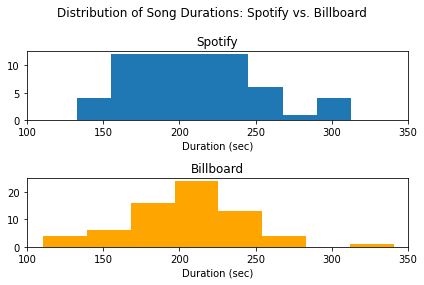

In [6]:
fig, axs = plt.subplots(2)
fig.suptitle('Distribution of Song Durations: Spotify vs. Billboard')
axs[0].hist(spotifyonly['duration_sec'], bins = 8)
axs[1].hist(billboardonly['duration_sec'], color = 'orange', bins = 8)
axs[0].set_title('Spotify')
axs[0].set_xlabel('Duration (sec)')
axs[0].set_xlim(100,350)
axs[1].set_title('Billboard')
axs[1].set_xlabel('Duration (sec)')
axs[1].set_xlim(100,350)
fig.tight_layout()
plt.show()

Here, we continue to see the trend of Billboard song durations clustering towards the average, while Spotify song durations are more spread out. This reflects on the relative homogeneity of the radio compared to the more plentiful and diverse possibilities of streaming playlists.

Let's run some significance tests to see if we can draw any conclusions from any of the trends identified in these plots. P-values of less than 0.05 are significant.

In [7]:
# T-test for 'valence' metric
tval, pval, df = sm.ttest_ind(spotifyonly['valence'],
                              billboardonly['valence'])

In [8]:
tval

-2.853118137140067

In [9]:
pval

0.005044592954997676

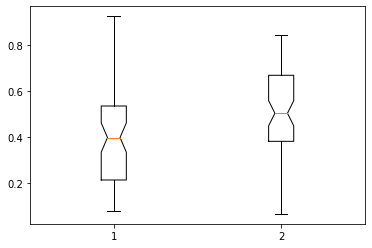

In [10]:
# Test boxplot for 'valence'
plt.boxplot((spotifyonly['valence'],
                              billboardonly['valence']), notch=True)
plt.show()

In [11]:
# T-test for song duration
tval, pval, df = sm.ttest_ind(spotifyonly['duration_sec'],
                              billboardonly['duration_sec'])
print(f't={tval:.2f} p={pval:.3f}')

t=0.93 p=0.354


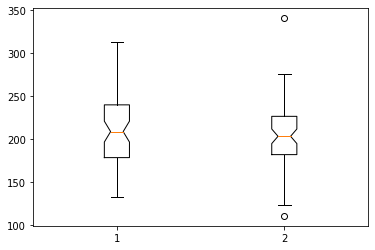

In [12]:
# Test boxplot for song duration
plt.boxplot((spotifyonly['duration_sec'],
                              billboardonly['duration_sec']), notch=True)
plt.show()

In [13]:
# Identifying outliers + other statistics for Billboard song durations
spotifyonly['duration_sec'].agg(['mean', 'min', 'max', 'idxmin', 'idxmax'])

mean      210.027381
min       132.832000
max       312.820000
idxmin     52.000000
idxmax     47.000000
Name: duration_sec, dtype: float64

In [14]:
spotifyonly.loc[[52,47]]

,Unnamed: 0,Unnamed: 0.1,rank,name,album,artist,release_date,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,explicit,duration_sec
52,31,31,32,Martin & Gina,THE GOAT,Polo G,2020-05-15,0.832,0.34500,0.534,0.0,0.165,-7.813,0.253,93.924,0.116,True,132.832
47,49,49,50,SICKO MODE,ASTROWORLD,Travis Scott,2018-08-03,0.834,0.00513,0.730,0.0,0.124,-3.714,0.222,155.008,0.446,True,312.820


In [15]:
# T-test for 'danceability' metric
tval, pval, df = sm.ttest_ind(spotifyonly['danceability'],
                              billboardonly['danceability'])

print(f't={tval:.2f} p={pval:.3f}')

t=0.89 p=0.376


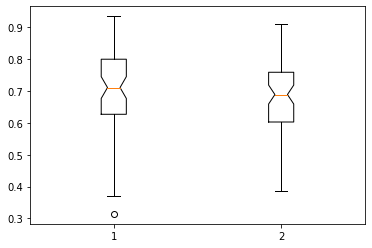

In [16]:
# Test boxplot for 'danceability'
plt.boxplot((spotifyonly['danceability'],
                              billboardonly['danceability']), notch=True)
plt.show()

In [17]:
# T-test for 'acousticness' metric
tval, pval, df = sm.ttest_ind(spotifyonly['acousticness'],
                              billboardonly['acousticness'])

print(f't={tval:.2f} p={pval:.3f}')

t=0.86 p=0.390


In [18]:
# T-test for 'liveness' metric
tval, pval, df = sm.ttest_ind(spotifyonly['liveness'],
                              billboardonly['liveness'])

print(f't={tval:.2f} p={pval:.3f}')

t=0.97 p=0.335


In [19]:
# T-test for 'energy' metric
tval, pval, df = sm.ttest_ind(spotifyonly['energy'],
                              billboardonly['energy'])

print(f't={tval:.2f} p={pval:.3f}')

t=-1.91 p=0.058


In [20]:
# Running correlation analysis between the variables
track_metrics = ['danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'explicit', 'duration_sec' ]
spotifyonly[track_metrics].corr()

,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,explicit,duration_sec
danceability,1.000000,-0.275722,-0.067519,-0.061448,-0.315481,0.137849,0.196508,-0.137139,0.238787,0.249073,-0.130635
acousticness,-0.275722,1.000000,-0.352722,-0.126354,-0.086695,-0.313859,-0.098960,-0.197541,0.188280,-0.274666,-0.090596
energy,-0.067519,-0.352722,1.000000,0.105278,0.134528,0.710937,-0.170805,0.226637,0.422940,-0.048522,0.171483
instrumentalness,-0.061448,-0.126354,0.105278,1.000000,0.477747,-0.078334,-0.129855,0.144777,0.017134,0.071016,-0.120460
liveness,-0.315481,-0.086695,0.134528,0.477747,1.000000,-0.088081,-0.137917,0.051688,-0.144234,0.175758,0.160804
loudness,0.137849,-0.313859,0.710937,-0.078334,-0.088081,1.000000,-0.167111,0.099286,0.408106,-0.169586,0.066378
speechiness,0.196508,-0.098960,-0.170805,-0.129855,-0.137917,-0.167111,1.000000,0.158691,-0.086534,0.371331,0.019121
tempo,-0.137139,-0.197541,0.226637,0.144777,0.051688,0.099286,0.158691,1.000000,-0.052986,0.069374,-0.009677
valence,0.238787,0.188280,0.422940,0.017134,-0.144234,0.408106,-0.086534,-0.052986,1.000000,-0.249051,0.000772
explicit,0.249073,-0.274666,-0.048522,0.071016,0.175758,-0.169586,0.371331,0.069374,-0.249051,1.000000,0.257394


<AxesSubplot:xlabel='acousticness', ylabel='energy'>

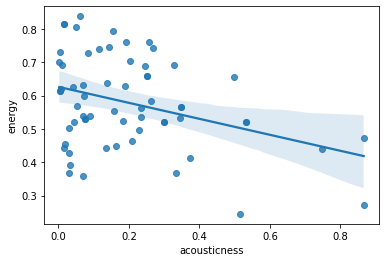

In [21]:
# Test plot showing the relationship between 'acousticness' and 'energy' for Spotify-only songs
sns.regplot(x='acousticness', y='energy', data=spotifyonly)

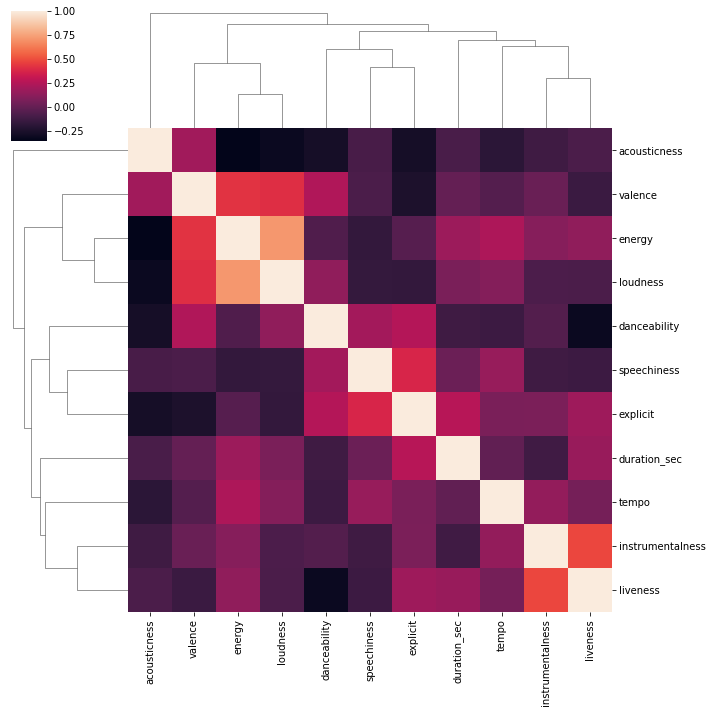

In [22]:
# K-means cluster map grouping similar variables within the Spotify-only list
sns.clustermap(spotifyonly[track_metrics].corr())

Now, we wanted to look at how the top artists with songs specific to each chart vary in terms of Spotify's track-level metrics.

In [23]:
# Identifying songs by artists on each chart who have more than 3 songs on that chart
spotify_topartists = spotifyonly.groupby("artist").filter(lambda x: len(x) >= 3)
billboard_topartists = billboardonly.groupby("artist").filter(lambda x: len(x) >= 3)

In [24]:
spotify_topartists['artist'].value_counts() # Displaying top Spotify artists

Juice WRLD      11
Post Malone      6
Travis Scott     4
Drake            3
Name: artist, dtype: int64

In [25]:
billboard_topartists['artist'].value_counts() # Displaying top Billboard artists

Maroon 5        5
Shawn Mendes    3
Chris Brown     3
BTS             3
Name: artist, dtype: int64

Juice WRLD, Post Malone, Travis Scott, and Drake are the top artists on the Spotify charts, when only looking at songs which have only appeared on Spotify, but not Billboard. Likewise, Maroon 5, Shawn Mendes, Chris Brown, and BTS are the top artists on the Billboard charts, when looking at Billboard-only songs. 

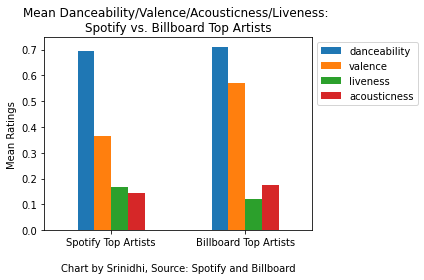

In [26]:
# Calculating means to plot
spotify_ta_dance = spotify_topartists['danceability'].mean()
spotify_ta_valence = spotify_topartists['valence'].mean()
spotify_ta_acous = spotify_topartists['acousticness'].mean()
spotify_ta_live = spotify_topartists['liveness'].mean()
billboard_ta_dance = billboard_topartists['danceability'].mean()
billboard_ta_valence = billboard_topartists['valence'].mean()
billboard_ta_acous = billboard_topartists['acousticness'].mean()
billboard_ta_live = billboard_topartists['liveness'].mean()

# Creating new dataframe and plotting
tasongdance = [spotify_ta_dance, billboard_ta_dance]
tasongvalence = [spotify_ta_valence, billboard_ta_valence]
tasongacous = [spotify_ta_acous, billboard_ta_acous]
tasonglive = [spotify_ta_live, billboard_ta_live]

index = ['Spotify Top Artists', 'Billboard Top Artists']
de_mean_df = pd.DataFrame({
    'danceability' : tasongdance, 
    'valence' : tasongvalence,
    'liveness' : tasonglive,
    'acousticness' : tasongacous}, index = index)

de_mean_df.plot.bar(rot = 0)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Mean Danceability/Valence/Acousticness/Liveness: \nSpotify vs. Billboard Top Artists')
plt.ylabel('Mean Ratings')
plt.xlabel('\nChart by Srinidhi, Source: Spotify and Billboard')
plt.tight_layout()
plt.savefig('../final_data_story/img_datastory/top_artists.png')
plt.show()

Notably, the mean valence in Billboard's top artists drastically exceeds Spotify top artists' mean valence. Mean acousticness is also higher in Billboard's top artists. Danceability seems to remain about the same on both charts, and although Spotify seems to have a higher mean liveness, the variable liveness is not as relevant here, since a quick look at the playlists will tell us none of these songs on the charts were recorded live with an audience.

In [27]:
# Conducting significance tests
spotifyta_valmean = spotify_topartists['valence'].mean()
billboardta_valmean = billboard_topartists['valence'].mean()
spotifyta_acousmean = spotify_topartists['acousticness'].mean()
billboardta_acousmean = billboard_topartists['acousticness'].mean()

t_val, p_val, df_val = sm.ttest_ind(spotify_topartists['valence'], billboard_topartists['valence'])
t_acous, p_acous, df_acous = sm.ttest_ind(spotify_topartists['acousticness'], billboard_topartists['acousticness'])

print(' ' * 27 + 'SPOTIFY' + ' ' * 23 + 'BILLBOARD' + ' ' * 16 + 'T-VALUE' + ' ' * 14 + 'P-VALUE')
print('=' * 115)
print(f'Mean Valence {spotifyta_valmean:>20.2f} {billboardta_valmean:>30.2f} {t_val:>23.2f} {p_val:20.3f}')
print(f'Mean Acousticness {spotifyta_acousmean:>15.2f} {billboardta_acousmean:>30.2f} {t_acous:>23.2f} {p_acous:20.3f}')

                           SPOTIFY                       BILLBOARD                T-VALUE              P-VALUE
Mean Valence                 0.37                           0.57                   -2.84                0.007
Mean Acousticness            0.14                           0.18                   -0.52                0.604


The difference in valence, but not the difference in acousticness, is significant. The songs of Billboard's top artists tend to have a higher valence / positiveness than the songs of Spotify's top artists. 